In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from PIL import Image
import os

# Set the path to the directory containing the images
path = '/kaggle/input/mango-leaf-disease-dataset/'
dict1=dict(
    anth = "Anthracnose/",
    bact = "Bacterial Canker/",
    cut = "Cutting Weevil/",
    die = "Die Back/",
    gall = "Gall Midge/",
    heal = "Healthy/",
    powder = "Powdery Mildew/",
    sooty = "Sooty Mould/",
)

# Set the size to resize the images to
size = (128,128)

# Set the path to the directory to save the resized images
output_path = '/kaggle/working/resized_images/'

# Create the output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Loop over all the categories
for category, subdirectory in dict1.items():
    # Create the subdirectory in the output directory for this category
    category_output_path = os.path.join(output_path, subdirectory)
    if not os.path.exists(category_output_path):
        os.makedirs(category_output_path)

    # Loop over all the image files in the directory for this category
    for filename in os.listdir(os.path.join(path, subdirectory)):
        # Open the image file
        img = Image.open(os.path.join(path, subdirectory, filename))

        # Resize the image
        img = img.resize(size)

        # Save the resized image to the output directory for this category
        output_filename = os.path.join(category_output_path, filename)
        img.save(output_filename)

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:
Powdery_Mildew = "/kaggle/working/resized_images/Powdery Mildew"
Anthracnose = "/kaggle/working/resized_images/Anthracnose"
Healthy = "/kaggle/working/resized_images/Healthy"
Cutting_Weevil = "/kaggle/working/resized_images/Cutting Weevil"
Die_Back = "/kaggle/working/resized_images/Die Back"
Sooty_Mould = "/kaggle/working/resized_images/Sooty Mould"
Bacterial = "/kaggle/working/resized_images/Bacterial Canker"
Gall = "/kaggle/working/resized_images/Gall Midge"

In [5]:
import matplotlib.pyplot as plt
from math import isnan

In [6]:
pic_size = 128

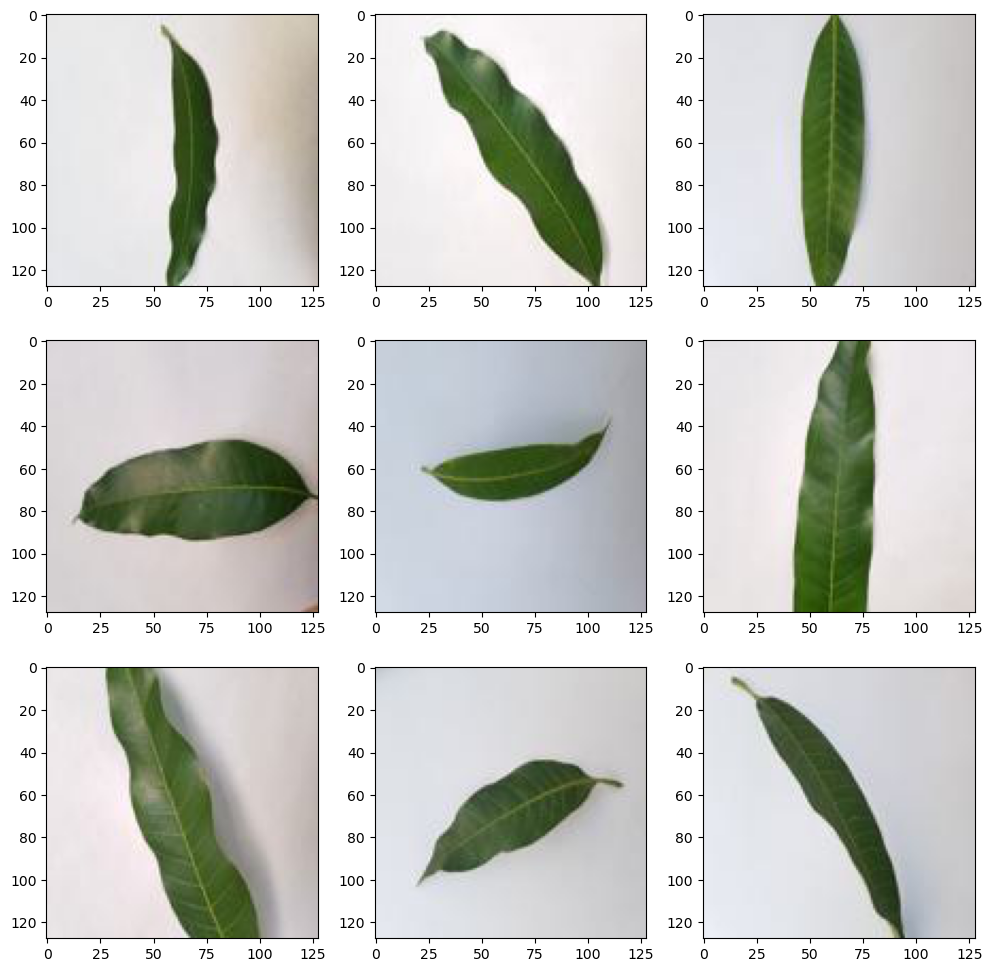

In [7]:
type = 'healthy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Healthy+"/"+
                  os.listdir(Healthy)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

In [8]:
# creating list of images 
Anthra = os.listdir(Anthracnose)
Bact = os.listdir(Bacterial)
Cut = os.listdir(Cutting_Weevil)
Die = os.listdir(Die_Back)
Midge = os.listdir(Gall)
Heal = os.listdir(Healthy)
Powder = os.listdir(Powdery_Mildew)
Sooty = os.listdir(Sooty_Mould)

In [9]:
import random
random.shuffle(Anthra)
random.shuffle(Bact)
random.shuffle(Cut)
random.shuffle(Die)
random.shuffle(Midge)
random.shuffle(Heal)
random.shuffle(Powder)
random.shuffle(Sooty)

In [29]:
import os
import random
import shutil

# Define the paths to the different disease categories
Powdery_Mildew = "/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/"
Anthracnose = "/kaggle/input/mango-leaf-disease-dataset/Anthracnose/"
Healthy = "/kaggle/input/mango-leaf-disease-dataset/Healthy/"
Cutting_Weevil = "/kaggle/input/mango-leaf-disease-dataset/Cutting Weevil/"
Die_Back = "/kaggle/input/mango-leaf-disease-dataset/Die Back/"
Sooty_Mould = "/kaggle/input/mango-leaf-disease-dataset/Sooty Mould/"
Bacterial = "/kaggle/input/mango-leaf-disease-dataset/Bacterial Canker/"
Gall = "/kaggle/input/mango-leaf-disease-dataset/Gall Midge/"

# Define the paths to store the train and test datasets
train_dir = "/kaggle/working/train/"
test_dir = "/kaggle/working/test/"

# Create the train and test directories if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Define the categories list and the percentage of images to use for training
categories = ["Powdery Mildew", "Anthracnose", "Healthy", "Cutting Weevil", "Die Back", "Sooty_Mould", "Bacterial Canker", "Gall Midge"]
train_percent = 0.3

# Loop through each category and copy the images to the train and test directories
for category in categories:
    # Define the path to the source directory
    src_dir = eval(category)
    
    # Define the paths to the destination train and test directories
    train_dest_dir = os.path.join(train_dir, category)
    test_dest_dir = os.path.join(test_dir, category)
    
    # Create the train and test directories for the category if they do not exist
    if not os.path.exists(train_dest_dir):
        os.makedirs(train_dest_dir)
    
    if not os.path.exists(test_dest_dir):
        os.makedirs(test_dest_dir)
    
    # Get the list of image file names in the source directory
    file_names = os.listdir(src_dir)
    
    # Shuffle the list of file names randomly
    random.shuffle(file_names)
    
    # Calculate the number of images to use for training
    num_train = int(len(file_names) * train_percent)
    
    # Loop through each file and copy it to the train or test directory
    for i, file_name in enumerate(file_names):
        src_path = os.path.join(src_dir, file_name)
        
        if i < num_train:
            dest_path = os.path.join(train_dest_dir, file_name)
        else:
            dest_path = os.path.join(test_dest_dir, file_name)
        
        shutil.copy(src_path, dest_path)


SyntaxError: unexpected EOF while parsing (<string>, line 1)

In [21]:
batch_size=32
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_val=ImageDataGenerator(rescale=1./255)

train_set= datagen_train.flow_from_directory(train_dir,
                                            target_size=(pic_size,pic_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=False)
test_set=datagen_val.flow_from_directory(test_dir,
                                       target_size=(pic_size,pic_l),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 400 images belonging to 8 classes.
Found 3600 images belonging to 8 classes.


In [22]:
import os
import random
import shutil

# Define the paths to the different disease categories
Powdery_Mildew = "/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/"
Anthracnose = "/kaggle/input/mango-leaf-disease-dataset/Anthracnose/"
Healthy = "/kaggle/input/mango-leaf-disease-dataset/Healthy/"
Cutting_Weevil = "/kaggle/input/mango-leaf-disease-dataset/Cutting Weevil/"
Die_Back = "/kaggle/input/mango-leaf-disease-dataset/Die Back/"
Sooty_Mould = "/kaggle/input/mango-leaf-disease-dataset/Sooty Mould/"
Bacterial = "/kaggle/input/mango-leaf-disease-dataset/Bacterial Canker/"
Gall = "/kaggle/input/mango-leaf-disease-dataset/Gall Midge/"

# Define the paths to store the train and test datasets
train_dir = "/kaggle/working/train/"
test_dir = "/kaggle/working/test/"

# Remove the existing train and test directories if they exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test directories
os.makedirs(train_dir)
os.makedirs(test_dir)

# Define the categories list and the percentage of images to use for training and testing
categories = ["Powdery_Mildew", "Anthracnose", "Healthy", "Cutting_Weevil", "Die_Back", "Sooty_Mould", "Bacterial", "Gall"]
train_percent = 0.2
test_percent = 0.2

# Loop through each category and copy the images to the train and test directories
for category in categories:
    # Define the path to the source directory
    src_dir = eval(category)
    
    # Define the paths to the destination train and test directories
    train_dest_dir = os.path.join(train_dir, category)
    test_dest_dir = os.path.join(test_dir, category)
    
    # Create the train and test directories for the category
    os.makedirs(train_dest_dir)
    os.makedirs(test_dest_dir)
    
    # Get the list of image file names in the source directory
    file_names = os.listdir(src_dir)
    
    # Shuffle the list of file names randomly
    random.shuffle(file_names)
    
    # Calculate the number of images to use for training and testing
    num_train = int(len(file_names) * train_percent)
    num_test = int(len(file_names) * test_percent)
    
    # Loop through each file and copy it to the train or test directory
    for i, file_name in enumerate(file_names):
        src_path = os.path.join(src_dir, file_name)
        
        if i < num_train:
            dest_path = os.path.join(train_dest_dir, file_name)
        elif i < num_train + num_test:
            dest_path = os.path.join(test_dest_dir, file_name)
        else:
            break
        
        shutil.copy(src_path, dest_path)


In [23]:
batch_size=64
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_val=ImageDataGenerator(rescale=1./255)

train_set= datagen_train.flow_from_directory(train_dir,
                                            target_size=(pic_size,pic_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=False)
test_set=datagen_val.flow_from_directory(test_dir,
                                       target_size=(pic_size,pic_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [24]:
no_of_classes=8

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       2

In [25]:


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.1)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 7

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
     

In [27]:
# train_path = '/content/contentdrive/MyDrive/Kaggle_face_Emotion/images/train'
# test_path = '/content/contentdrive/MyDrive/Kaggle_face_Emotion/images/test'

# num_train_imgs = 0
# for root, dirs, files in os.walk(train_path):
#     num_train_imgs += len(files)
    
# num_test_imgs = 0
# for root, dirs, files in os.walk(test_path):
#     num_test_imgs += len(files)

epochs =5

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = train_set,
                                validation_steps = train_set.n//train_set.batch_size,
                                callbacks=callbacks_list
                    )

model.save('Mango_detection_model_7epochs.h5')

Epoch 1/5
25/25 [==============================] - 178s 7s/step - loss: 2.2628 - accuracy: 0.1787 - val_loss: 2.1534 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/5
25/25 [==============================] - 178s 7s/step - loss: 2.2204 - accuracy: 0.2062 - val_loss: 2.3087 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/5
25/25 [==============================] - 178s 7s/step - loss: 2.1675 - accuracy: 0.2412 - val_loss: 2.2405 - val_accuracy: 0.1275 - lr: 0.0010
Epoch 4/5
25/25 [==============================] - ETA: 0s - loss: 2.0715 - accuracy: 0.2713Restoring model weights from the end of the best epoch: 1.

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
25/25 [==============================] - 178s 7s/step - loss: 2.0715 - accuracy: 0.2713 - val_loss: 2.1919 - val_accuracy: 0.1538 - lr: 0.0010
Epoch 4: early stopping


In [35]:
print(test_labels) # should return (number of samples, number of features)
print(predicted_labels) # should return (number of samples,)

['Powdery_Mildew', 'Anthracnose', 'Healthy', 'Cutting_Weevil', 'Die_Back', 'Sooty_Mould', 'Bacterial', 'Gall']
[735 414 406 414 414 534 414 473]


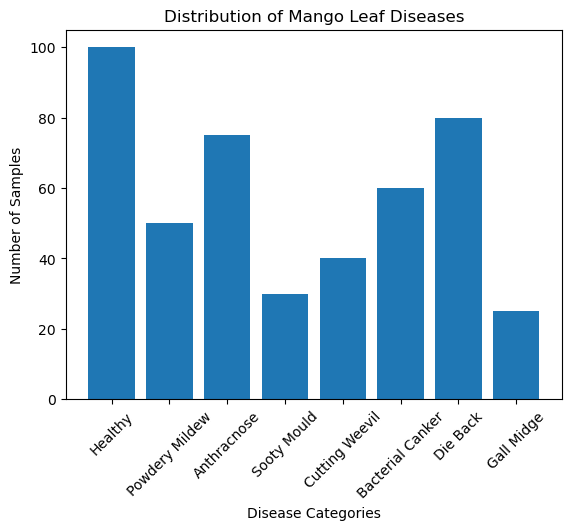

In [38]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding counts
categories = ['Healthy', 'Powdery Mildew', 'Anthracnose', 'Sooty Mould', 'Cutting Weevil', 'Bacterial Canker', 'Die Back', 'Gall Midge']
counts = [100, 50, 75, 30, 40, 60, 80, 25]

# Create a bar graph using matplotlib
plt.bar(categories, counts)

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and axis labels
plt.title('Distribution of Mango Leaf Diseases')
plt.xlabel('Disease Categories')
plt.ylabel('Number of Samples')

# Show the plot
plt.show()


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(
        rescale=1./255, # normalize pixel values to [0, 1]
        validation_split=0.2, # set aside 20% of the data for validation
        rotation_range=20, # randomly rotate images by up to 20 degrees
        zoom_range=0.2, # randomly zoom in on images by up to 20%
        horizontal_flip=True, # randomly flip images horizontally
        vertical_flip=False # do not flip images vertically
    )
    
    train_generator = datagen.flow_from_directory(
        "/kaggle/working/train",
        target_size=(pic_size, pic_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )
    
    val_generator = datagen.flow_from_directory(
        "/kaggle/working/train",
        target_size=(pic_size, pic_size),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
    
    return train_generator, val_generator


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model
model = load_model('Mango_detection_model_7epochs.h5')

# Load and preprocess the input data
X_test, y_test = load_and_preprocess_data('test_dir')
X_test = np.array(X_test)
y_test = np.array(y_test)

# Generate predictions on the test data
y_pred = model.predict(X_test)

# Get the category names
categories = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']

# Get the counts of true labels and predicted labels for each category
true_counts = [np.sum(y_test == i) for i in range(len(categories))]
pred_counts = [np.sum(np.argmax(y_pred, axis=1) == i) for i in range(len(categories))]

# Create a bar graph of the counts
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(categories)) - 0.2, true_counts, width=0.4, label='True')
plt.bar(np.arange(len(categories)) + 0.2, pred_counts, width=0.4, label='Predicted')
plt.xticks(np.arange(len(categories)), categories, rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.show()


AttributeError: shape